In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

In [4]:
print("Dataset Shape:", X.shape)
print("Classes:", dict(zip(range(len(cancer.target_names)), cancer.target_names)))

Dataset Shape: (569, 30)
Classes: {0: np.str_('malignant'), 1: np.str_('benign')}


In [18]:
print("\n========== First 5 Rows ==========")
print(X.head())


========== First 5 Rows ==========
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst text

In [19]:
print("\n========== Column Names ==========")
print(list(X.columns))


========== Column Names ==========
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [20]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

/tmp/ipython-input-3431823133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


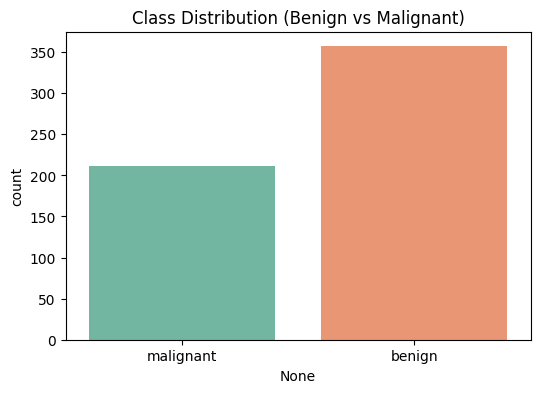

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="Set2")
plt.xticks([0, 1], cancer.target_names)
plt.title("Class Distribution (Benign vs Malignant)")
plt.show()

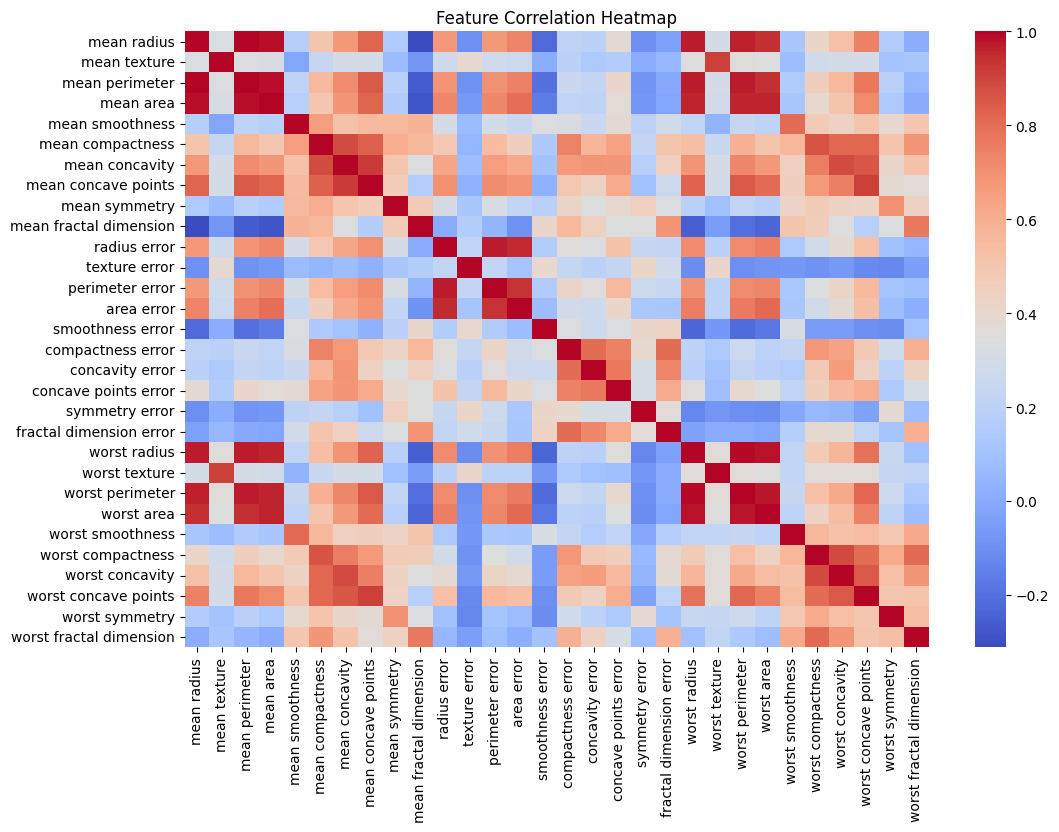

In [6]:
plt.figure(figsize=(12, 8))
corr = X.corr()
sns.heatmap(corr, cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
svm = SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, random_state=42)
svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [10]:
y_pred = svm.predict(X_test)

In [11]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[ 62   2]
 [  2 105]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        64
           1       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


Accuracy: 0.9766081871345029


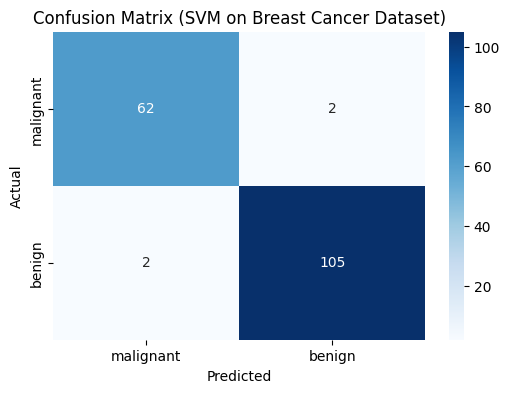

In [12]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title("Confusion Matrix (SVM on Breast Cancer Dataset)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
train_sizes, train_scores, test_scores = learning_curve(
    svm, X, y, cv=5, scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

In [14]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

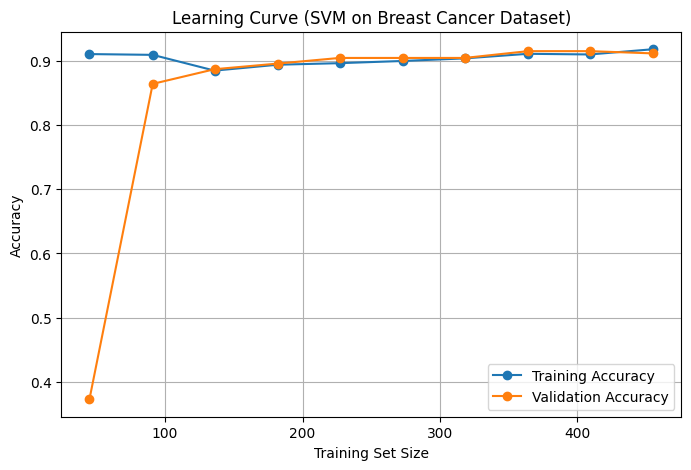

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Accuracy", marker="o")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (SVM on Breast Cancer Dataset)")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
cv_scores = cross_val_score(svm, X, y, cv=5, scoring="accuracy")
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
Mean CV Accuracy: 0.9121720229777983
